In [1]:
%pylab inline

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/dm4/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


(0.04965634224467135, 8.16179195343053e-06, 13, 1570.7963267948965)

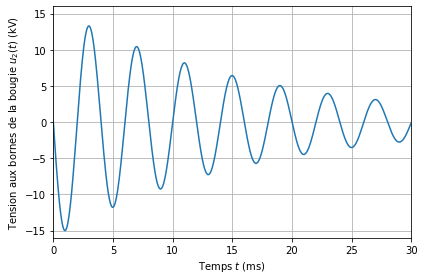

In [15]:
E   = 12
r   = 6
I1  = E/r

omega0 = 2*np.pi / 4e-3
Q = 13

L   = r * Q / omega0
C   = 1 / r / Q / omega0

mu     = omega0 / 2 / Q
omega  = omega0 * np.sqrt(1 - 1/4/Q**2)
alpha  = 1

def uc(t):
    fact_exp = np.exp(-mu*t) / C
    fact_cos = - C*E
    fact_sin = (I1 - mu * C * E) / omega
    return fact_exp * (fact_cos * np.cos(omega*t) + fact_sin * np.sin(omega*t)) + E

def deriv(x,y):
    return x[:-1], (y[1:]-y[:-1]) / (x[1:]-x[:-1])

def u2(t):
    fact_exp = alpha * np.exp(-mu*t)
    fact_cos = C*E*omega**2 - 2*mu*I1 + mu**2*C*E
    fact_sin = -I1*omega - mu * (C*E*omega - mu/omega*(I1-mu*C*E))
    return fact_exp * (fact_cos * np.cos(omega*t) + fact_sin * np.sin(omega*t))

t = np.linspace(0,30e-3,1000)
u = u2(t)

plt.figure(figsize=(6,4))
plt.plot(t*1e3, 15e3 * u/np.max(np.abs(u))*1e-3)
plt.xlim(0,30)
plt.ylim(-16,16)
plt.xlabel(r"Temps $t$ (ms)")
plt.ylabel("Tension aux bornes de la bougie $u_2(t)$ (kV)")
plt.grid("on")

mysavefig("tension_bougie.png")
L, C, Q, omega0

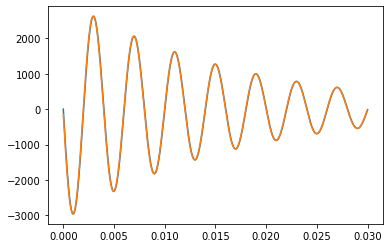

In [32]:
plt.plot(t, u2(t))
x, y = deriv(t, C * uc(t))
x, y = deriv(x, y)
plt.plot(x,y)

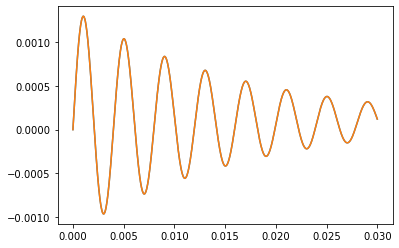

In [16]:
from scipy.integrate import odeint

E = 12
r = 6
omega0 = 2*np.pi / 4e-3
Q      = 13
L   = r * Q / omega0
C   = 1 / r / Q / omega0
I1 = E/r

mu     = omega0 / 2 / Q
omega  = omega0 * np.sqrt(1 - 1/4/Q**2)

Q0     = C*E

def charge_primaire(V, t):
    x, y = V
    dx = y
    dy = - omega0 / Q * y - omega0**2 * x + omega0**2 * Q0
    dV = [dx, dy]
    return dV

t = np.linspace(0, 30e-3, 1000)
V0 = [0,I1]
V = odeint(charge_primaire, V0, t)
q = V[:,0]
plt.plot(t,q)

def q_ana(t):
    fact_exp = np.exp(-mu*t)
    fact_cos = - C*E
    fact_sin = (I1 - mu * C * E) / omega
    return fact_exp * (fact_cos * np.cos(omega*t) + fact_sin * np.sin(omega*t)) + C*E
plt.plot(t,q_ana(t))